## H1N1 AND SEASONAL FLU VACCINE - Classification Problem
### This Notebook will look at a classification problem of the above dataset.
### We will look at vaccination, a key public health measure used to fight infectious diseases. We will predict whether people got H1N1 and seasonal flu vaccines using information they shared about their backgrounds, opinions, and health behaviours.
### A better understanding of how this information is associated with personal vaccination patterns can provide guidance for future public health efforts.

In [1]:
#Fit a logistic regression model using Scikit-learn
import pandas as pd
df = pd.read_csv("H1N1_Flu_Vaccines.csv")
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [3]:
#Cleaning our dataset
df = df.dropna()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6437 entries, 1 to 26703
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                6437 non-null   int64  
 1   h1n1_concern                 6437 non-null   float64
 2   h1n1_knowledge               6437 non-null   float64
 3   behavioral_antiviral_meds    6437 non-null   float64
 4   behavioral_avoidance         6437 non-null   float64
 5   behavioral_face_mask         6437 non-null   float64
 6   behavioral_wash_hands        6437 non-null   float64
 7   behavioral_large_gatherings  6437 non-null   float64
 8   behavioral_outside_home      6437 non-null   float64
 9   behavioral_touch_face        6437 non-null   float64
 10  doctor_recc_h1n1             6437 non-null   float64
 11  doctor_recc_seasonal         6437 non-null   float64
 12  chronic_med_condition        6437 non-null   float64
 13  child_under_6_months  

In [5]:
df.drop(columns=['respondent_id', 'health_worker', 'health_insurance', 'rent_or_own', 'hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation'], inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6437 entries, 1 to 26703
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 6437 non-null   float64
 1   h1n1_knowledge               6437 non-null   float64
 2   behavioral_antiviral_meds    6437 non-null   float64
 3   behavioral_avoidance         6437 non-null   float64
 4   behavioral_face_mask         6437 non-null   float64
 5   behavioral_wash_hands        6437 non-null   float64
 6   behavioral_large_gatherings  6437 non-null   float64
 7   behavioral_outside_home      6437 non-null   float64
 8   behavioral_touch_face        6437 non-null   float64
 9   doctor_recc_h1n1             6437 non-null   float64
 10  doctor_recc_seasonal         6437 non-null   float64
 11  chronic_med_condition        6437 non-null   float64
 12  child_under_6_months         6437 non-null   float64
 13  opinion_h1n1_vacc_effe

In [7]:
# In Logistic Regression, we cannot work with 'object/string' values. 
# We will convert the 12 columns with 'object/string' values to numeric using dummies/One-Hot-Encoded. "get_dummies."
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
import numpy as np
obj_cols = df.select_dtypes(include = 'object').columns
obj_cols


Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'employment_status'],
      dtype='object')

In [8]:
#Changing object to categorical
df[obj_cols] = df[obj_cols].astype('category')

In [9]:
#Encode
df_encoded = pd.get_dummies(df, columns=obj_cols, drop_first=True)
df_encoded.dtypes

h1n1_concern                    float64
h1n1_knowledge                  float64
behavioral_antiviral_meds       float64
behavioral_avoidance            float64
behavioral_face_mask            float64
behavioral_wash_hands           float64
behavioral_large_gatherings     float64
behavioral_outside_home         float64
behavioral_touch_face           float64
doctor_recc_h1n1                float64
doctor_recc_seasonal            float64
chronic_med_condition           float64
child_under_6_months            float64
opinion_h1n1_vacc_effective     float64
opinion_h1n1_risk               float64
opinion_h1n1_sick_from_vacc     float64
opinion_seas_vacc_effective     float64
opinion_seas_risk               float64
opinion_seas_sick_from_vacc     float64
household_adults                float64
household_children              float64
h1n1_vaccine                      int64
seasonal_vaccine                  int64
age_group_35 - 44 Years            bool
age_group_45 - 54 Years            bool


In [10]:
# Defining X and y
y = df_encoded["h1n1_vaccine"]
X = df_encoded.drop ("h1n1_vaccine", axis=1)

In [11]:
# Performing a Train_Test_Split
# Specifying a 'random_state' means that we will get consistent results even if the kernel is restarted.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

In [12]:
logreg = LogisticRegression(fit_intercept = False, C=1e12, solver='liblinear')
logreg.fit(X_train, y_train)
print (logreg)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')


In [13]:
# Predict
y_hat_test = logreg.predict(X_test)

In [14]:
#Data Preview
print ("")
df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,education,race,sex,income_poverty,marital_status,employment_status,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,12 Years,White,Male,Below Poverty,Not Married,Employed,0.0,0.0,0,1
7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,Some College,White,Female,"<= $75,000, Above Poverty",Married,Employed,2.0,0.0,1,1
10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Employed,2.0,0.0,1,1
11,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,College Graduate,White,Male,"> $75,000",Married,Employed,1.0,2.0,1,1
15,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,College Graduate,White,Female,"> $75,000",Married,Employed,1.0,3.0,0,0


In [15]:
#Draw the ROC Curve
from sklearn.metrics import roc_curve, auc
y_score = logreg.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
print ('AUC:{}'.format(auc(fpr,tpr)))

AUC:0.8668584215619308


## ROC AND AUC EXPLAINED
### ROC (Receiver Operating Characteristic) Curve illustrates the True Positive Rate (Recall) against the False Positive Rate of our classifier. When training a classifier, the best performing models will have an ROC Curve that hugs the upper left corner of the graph. The ROC Curve gives us a graph of the tradeoff between the FPR and TPR as stated above. The AUC (Area Under the Curve) gives us a singular metric to compare these. An AUC of 1 is a perfect classifier, and an AUC of 0.5 is one that has a precision of 50%.
### Our dataset has an AUC of 0.8669, indicating strong discriminating power between positive and negative outcomes. The model has an 86.7% chance of correctly ranking a randomly chosen vaccinated individual higher than a randomly chosen non-vaccinated individual.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

AUC:0.8668584215619308


<function matplotlib.pyplot.show(close=None, block=None)>

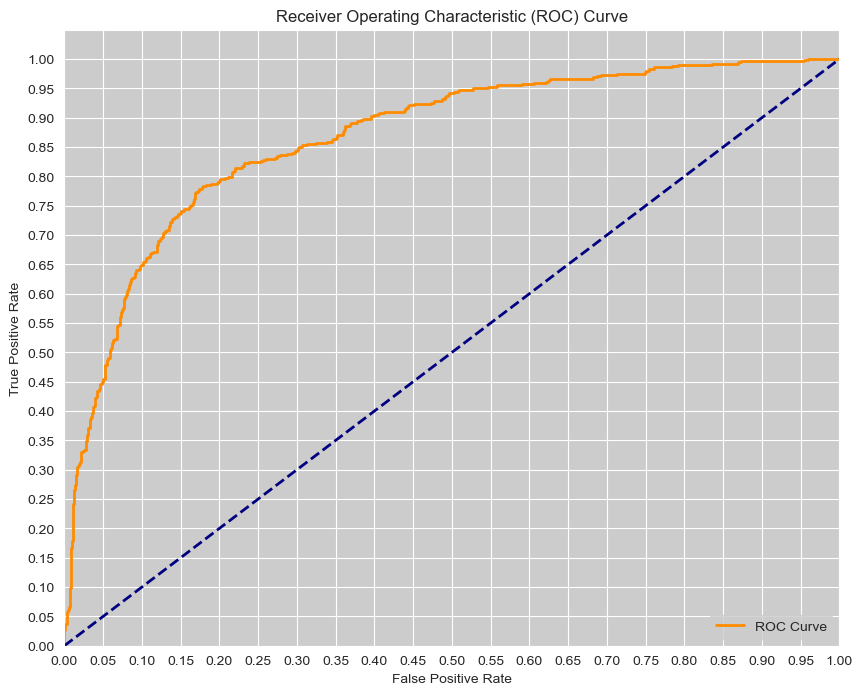

In [17]:
#Visualizing ROC/AUC
sns.set_style('darkgrid', {'axes.facecolor':'0.8'})
print ('AUC:{}'.format(auc(fpr,tpr)))
plt.figure(figsize = (10,8))
lw = 2
plt.plot(fpr,tpr,color='darkorange',
         lw=lw, label ='ROC Curve')
plt.plot([0,1],[0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend (loc = 'lower right')
plt.show

## DECISION TREES
### We will introduce another kind of model for predicting values that can be used for both continuous and categorical predictions. They are a different type of classifier that performs a recursive partition of the sample space. They are used to classify (or estimate continuous values) by performing the sample space as efficiently as possible into sets with similar data points until you get to (or close to) a homogenous set and can reasonably predict the value for new data points.

In [20]:
#Importing necessary modules
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

In [19]:
# Ensure categorical features are strings
X_train = X_train.astype(str)
X_test  = X_test.astype(str)

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(
    drop='first',
    handle_unknown='ignore',
    sparse_output=False
)

X_train_ohe = ohe.fit_transform(X_train)
X_test_ohe  = ohe.transform(X_test)

C:\Users\user\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [18] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [21]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_ohe, y_train)

DecisionTreeClassifier(random_state=42)

In [22]:
y_preds = clf.predict(X_test_ohe)

In [23]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_preds))

Accuracy: 0.7813664596273292


## Deductions
### An accuracy of 0.78 (or 78%) for this decision tree model on the H1N1 and Seasonal Flu dataset means that the model correctly predicts whether someone received the vaccine 78% of the time. Out of every 100 predictions, the model gets about 78 correct and 22 wrong. It's performing reasonably well - better than random guessing (which would be ~50% for binary classification). There's still a 22% error rate, meaning the model misclassifies about 1 in 5 cases. For improvements, we might try pruning to avoid overfitting.

## H1N1 and Seasonal Flu Conclusions
### Logistic Regression is better for this H1N1/Seasonal Flu dataset - and by a meaningful margin (86.69% vs 78%). Here's why:
### The Performance Gap
### 1. The 8.69 percentage point difference is significant in machine learning.
### 2. Logistic Regression correctly predicts ~87 out of 100 cases
### 3. Decision Tree correctly predicts ~78 out of 100 cases
### 4. That's 9 fewer errors per 100 predictions with Logistic Regression